In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv('data/train.csv', index_col = 'id')
test = pd.read_csv('data/test.csv', index_col = 'id')

In [6]:
train.shape

(19219, 34)

In [7]:
test.shape

(12814, 27)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19219 entries, 0 to 19218
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              19219 non-null  int64  
 1   X_Maximum              19219 non-null  int64  
 2   Y_Minimum              19219 non-null  int64  
 3   Y_Maximum              19219 non-null  int64  
 4   Pixels_Areas           19219 non-null  int64  
 5   X_Perimeter            19219 non-null  int64  
 6   Y_Perimeter            19219 non-null  int64  
 7   Sum_of_Luminosity      19219 non-null  int64  
 8   Minimum_of_Luminosity  19219 non-null  int64  
 9   Maximum_of_Luminosity  19219 non-null  int64  
 10  Length_of_Conveyer     19219 non-null  int64  
 11  TypeOfSteel_A300       19219 non-null  int64  
 12  TypeOfSteel_A400       19219 non-null  int64  
 13  Steel_Plate_Thickness  19219 non-null  int64  
 14  Edges_Index            19219 non-null  float64
 15  Empty_I

In [9]:
train.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [10]:
train.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,,,,,,,,,,,,,,,
19214,749,757,143210,143219,17,4,4,2193,122,140,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,723,735,2488529,2488541,231,17,26,27135,104,133,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,6,31,1578055,1578129,780,114,98,71112,41,94,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,9,18,1713172,1713184,126,13,26,14808,88,132,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1
19218,1505,1525,1733458,1733471,182,24,33,22785,98,143,...,0.5263,-0.1120,0.6619,0,0,0,0,0,1,0


In [11]:
def report(data) :
    report = pd.DataFrame(index = data.columns)
    report['type'] = data.dtypes
    report['count'] = data.count()
    report['nunique'] = data.nunique()
    report['%unique'] = report['nunique'] / len(data) * 100
    report['null'] = data.isnull().sum()
    report['%null'] = report['null'] / len(data) * 100
    report['min'] = data.min()
    report['max'] = data.max()
    return report
report(train)

,type,count,nunique,%unique,null,%null,min,max
X_Minimum,int64,19219,1191,6.196993,0,0.0,0.0000,1.705000e+03
X_Maximum,int64,19219,1259,6.550809,0,0.0,4.0000,1.713000e+03
Y_Minimum,int64,19219,3345,17.404652,0,0.0,6712.0000,1.298766e+07
Y_Maximum,int64,19219,3341,17.383839,0,0.0,6724.0000,1.298769e+07
Pixels_Areas,int64,19219,1154,6.004475,0,0.0,6.0000,1.526550e+05
X_Perimeter,int64,19219,460,2.393465,0,0.0,2.0000,7.553000e+03
Y_Perimeter,int64,19219,331,1.722254,0,0.0,1.0000,9.030000e+02
Sum_of_Luminosity,int64,19219,2595,13.502263,0,0.0,250.0000,1.159141e+07
Minimum_of_Luminosity,int64,19219,162,0.842916,0,0.0,0.0000,1.960000e+02
Maximum_of_Luminosity,int64,19219,98,0.509912,0,0.0,39.0000,2.530000e+02


In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02
Maximum_of_Luminosity,19219.0,1.286474e+02,1.419698e+01,39.0000,124.00000,1.270000e+02,1.350000e+02,2.530000e+02


<Axes: >

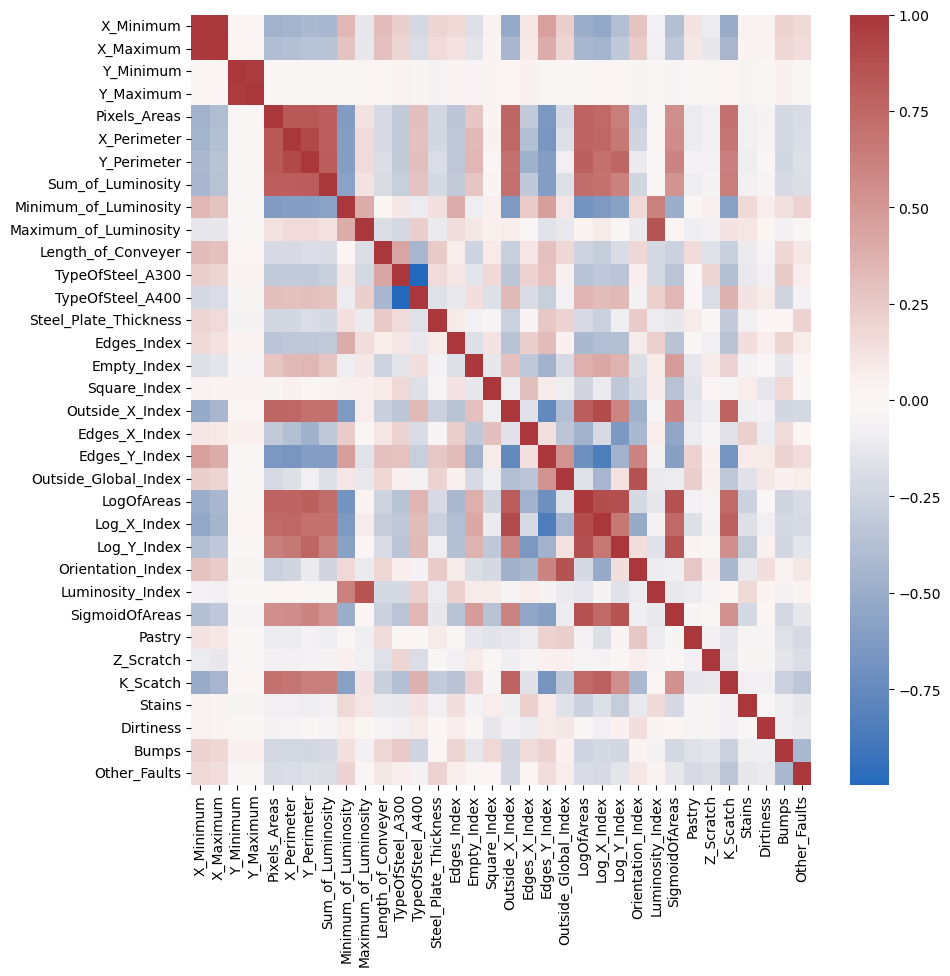

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), center=0, cmap='vlag',)

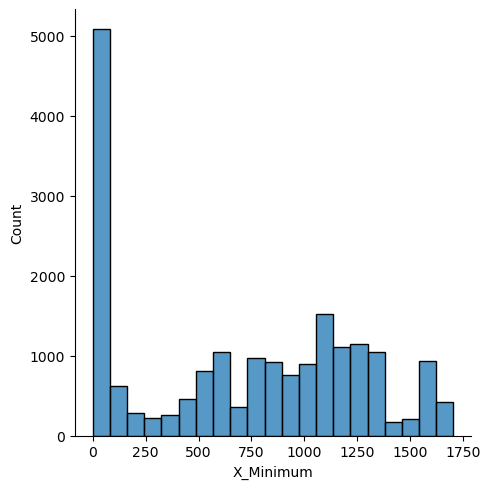

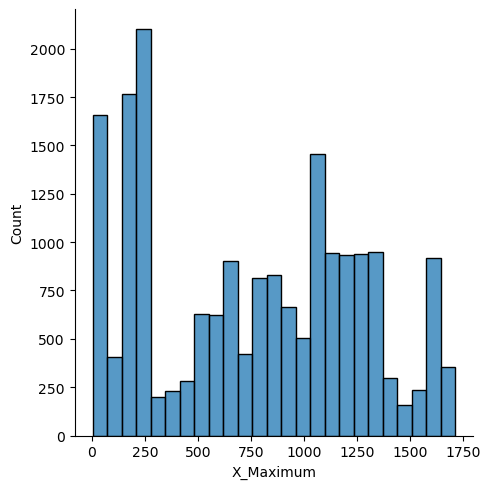

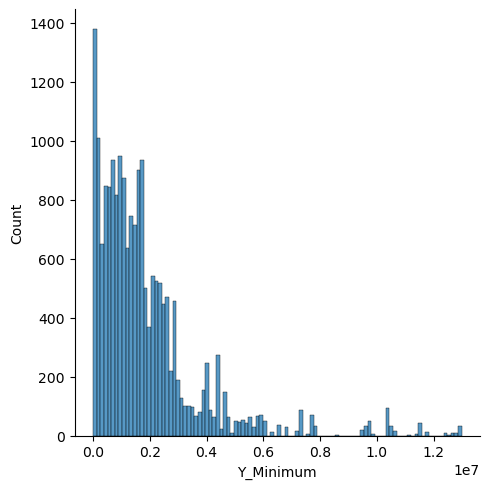

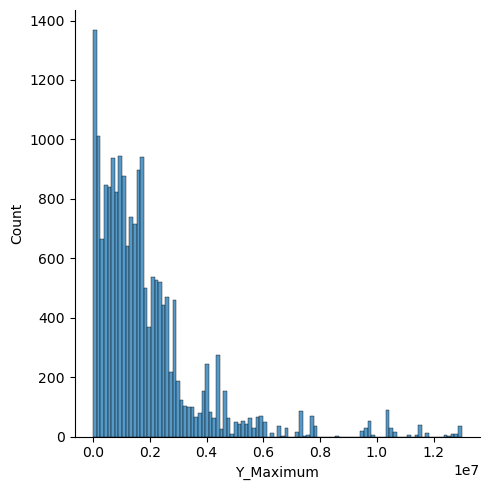

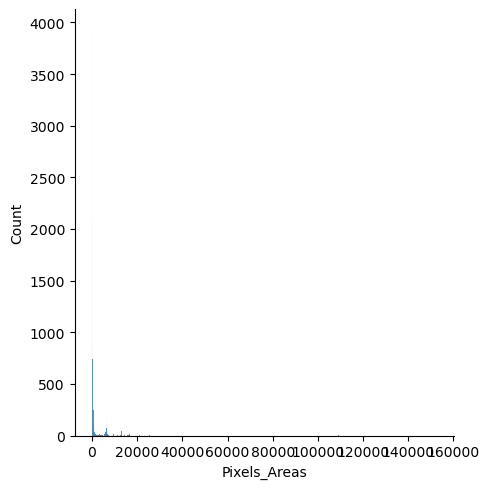

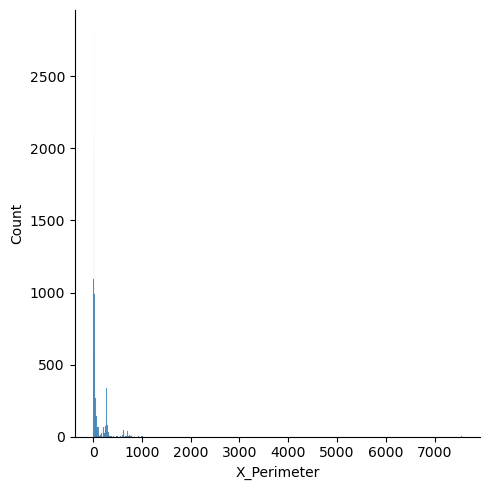

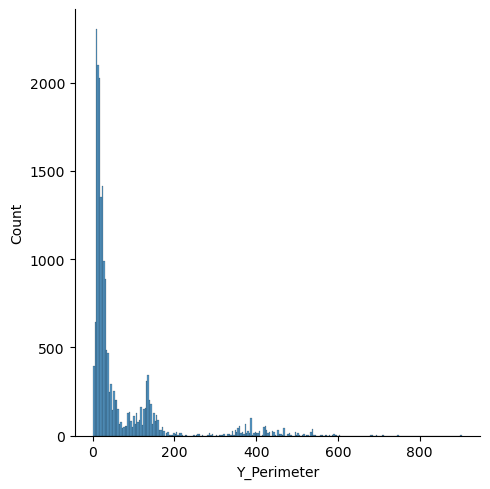

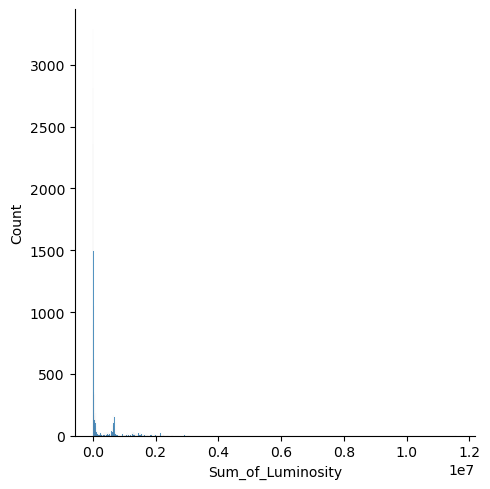

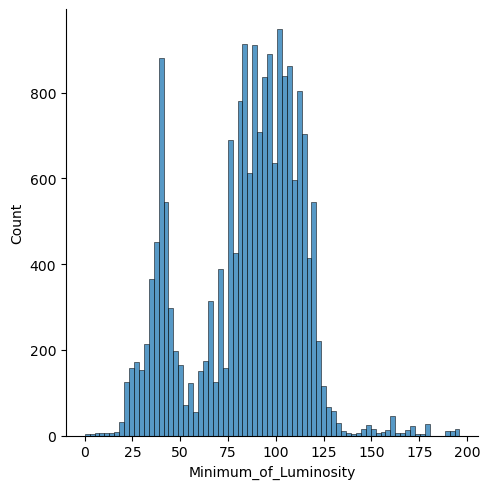

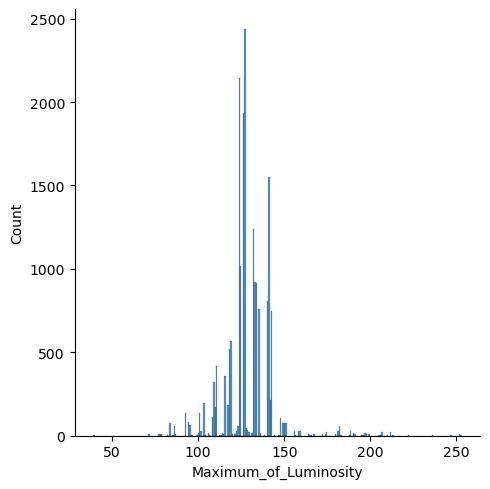

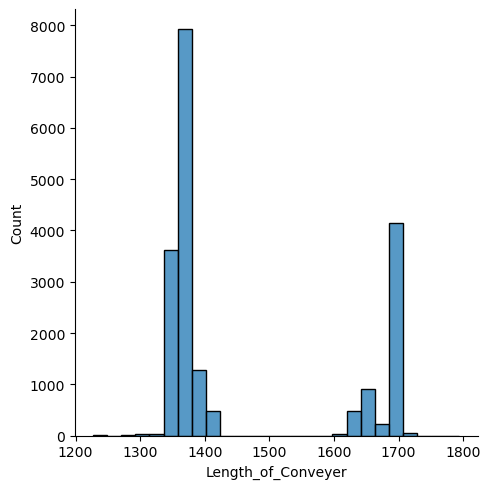

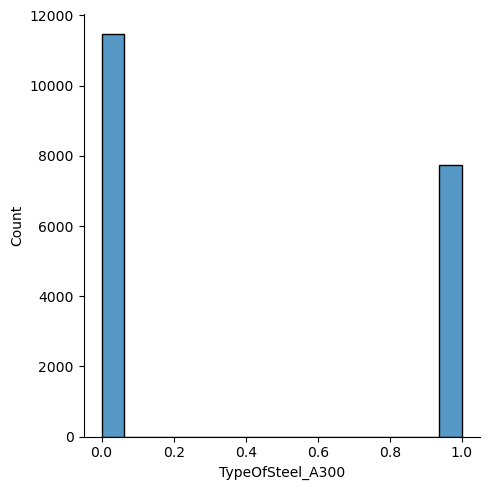

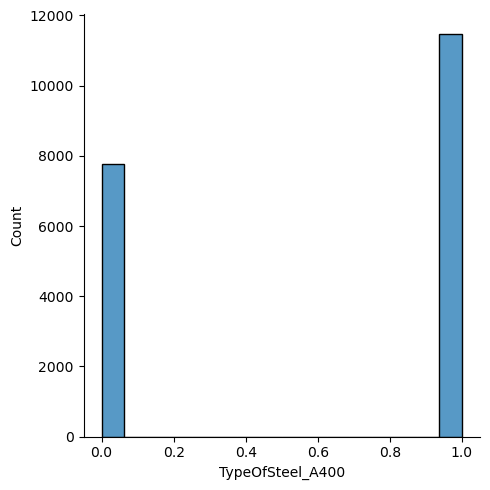

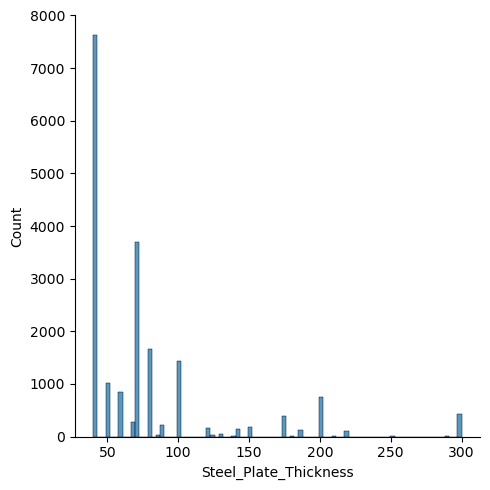

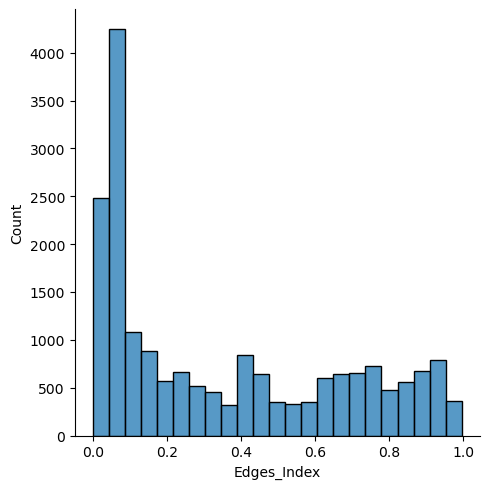

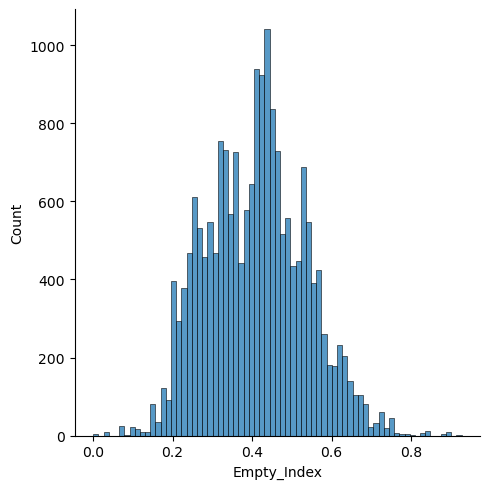

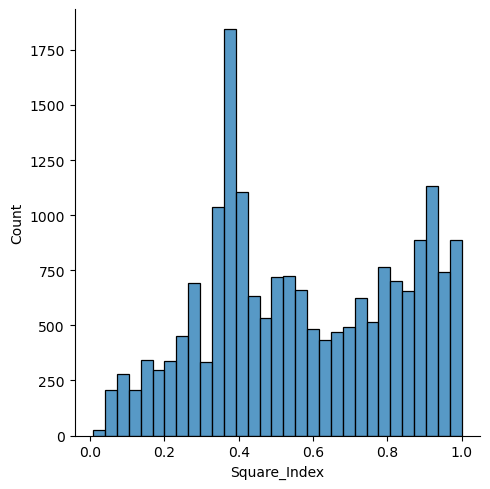

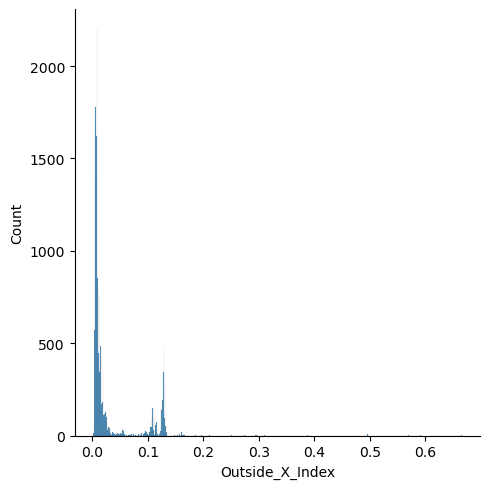

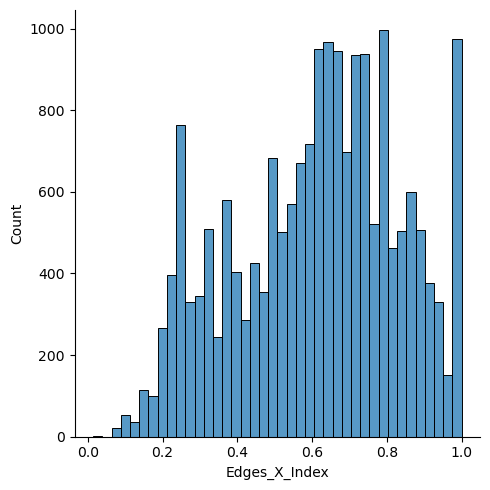

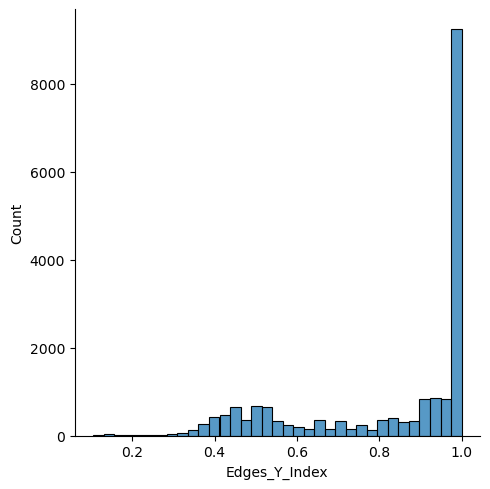

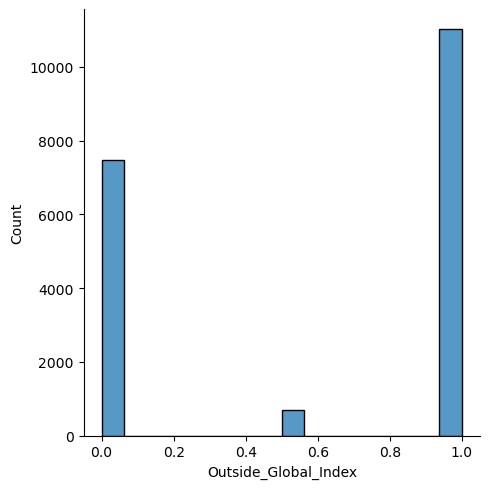

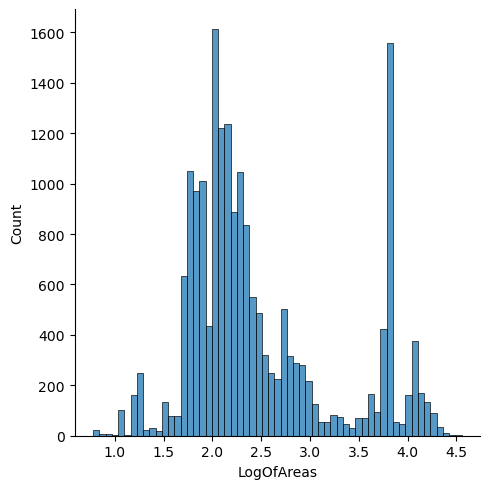

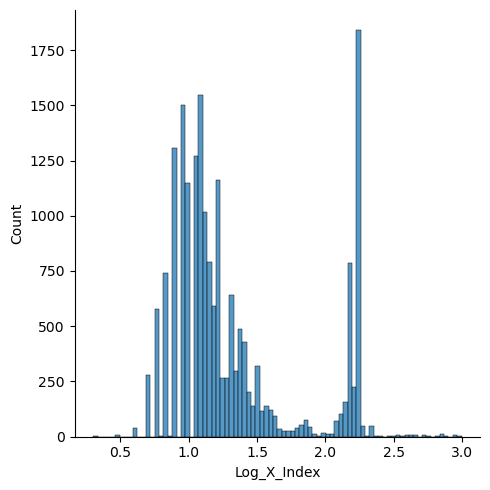

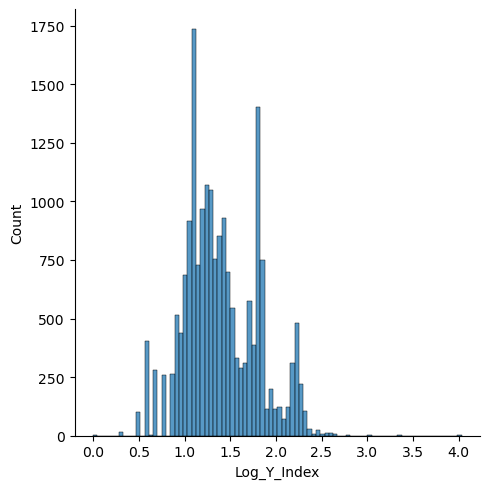

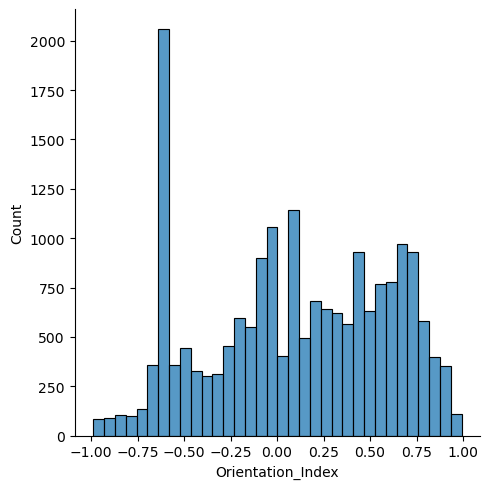

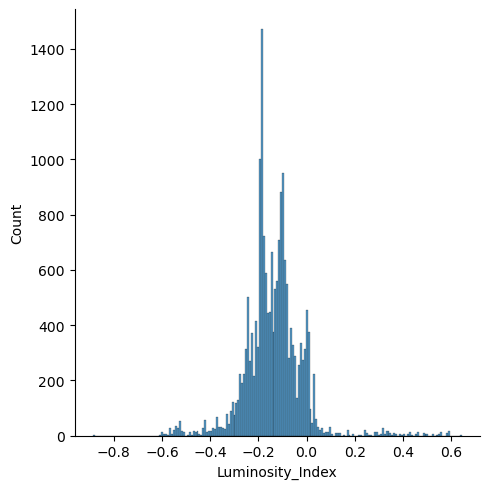

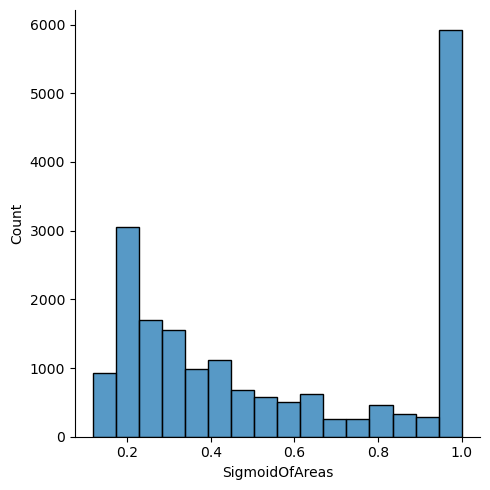

In [14]:
for column in train.columns[:-7] : 
    sns.displot(train[column])
    plt.show()

In [22]:
train.drop(columns=target)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,...,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,...,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901
19215,723,735,2488529,2488541,231,17,26,27135,104,133,...,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378
19216,6,31,1578055,1578129,780,114,98,71112,41,94,...,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997


In [20]:
target = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults']

In [23]:
train[target]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
19214,0,0,0,1,0,0,0
19215,0,0,0,0,0,0,1
19216,1,0,0,0,0,0,0
